In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LakeModel:
    """
    Solves the lake model and computes dynamics of the unemployment stocks and
    rates.

    Parameters:
    ------------
    λ : scalar
        The job finding rate for currently unemployed workers
    α : scalar
        The dismissal rate for currently employed workers
    b : scalar
        Entry rate into the labor force
    d : scalar
        Exit rate from the labor force

    """
    def __init__(self, λ=0.1, α=0.013, b=0.0124, d=0.00822):
        self.λ, self.α, self.b, self.d = λ, α, b, d

        λ, α, b, d = self.λ, self.α, self.b, self.d
        self.g = b - d
        g = self.g

        self.A = np.array([[(1-d)*(1-λ) + b,   α*(1-d) + b],
                           [        (1-d)*λ,   (1-α)*(1-d)]])


        self.ū = (1 + g - (1 - d) * (1 - α)) / (1 + g - (1 - d) * (1 - α) + (1 - d) * λ)
        self.ē = 1 - self.ū


    def simulate_path(self, x0, T=1000):
        """
        Simulates the sequence of employment and unemployment

        Parameters
        ----------
        x0 : array
            Contains initial values (u0,e0)
        T : int
            Number of periods to simulate

        Returns
        ----------
        x : iterator
            Contains sequence of employment and unemployment rates

        """
        x0 = np.atleast_1d(x0)  # Recast as array just in case
        x_ts= np.zeros((2, T))
        x_ts[:, 0] = x0
        for t in range(1, T):
            x_ts[:, t] = self.A @ x_ts[:, t-1]
        return x_ts

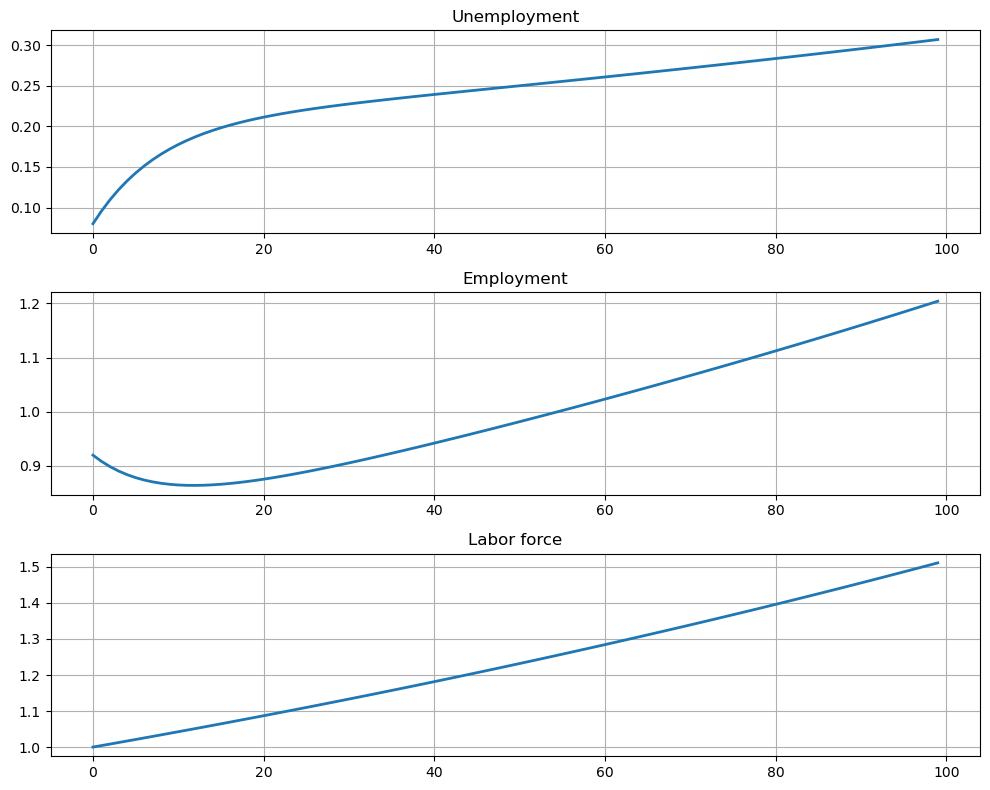

In [3]:
lm = LakeModel()
e_0 = 0.92          # Initial employment
u_0 = 1 - e_0       # Initial unemployment, given initial n_0 = 1

lm = LakeModel()
T = 100         # Simulation length

x_0 = (u_0, e_0)
x_path = lm.simulate_path(x_0, T)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))


axes[0].plot(x_path[0, :], lw=2)
axes[0].set_title('Unemployment')

axes[1].plot(x_path[1, :], lw=2)
axes[1].set_title('Employment')

axes[2].plot(x_path.sum(0), lw=2)
axes[2].set_title('Labor force')

for ax in axes:
    ax.grid()

plt.tight_layout()
plt.show()

In [4]:
def plot_time_paths(lm, x0=None, T=1000, ax=None):
        """
        Plots the simulated time series.

        Parameters
        ----------
        lm : class
            Lake Model
        x0 : array
            Contains some different initial values.
        T : int
            Number of periods to simulate

        """


        if x0 is None:
            x0 = np.array([[5.0, 0.1]])

        ū, ē = lm.ū, lm.ē

        x0 = np.atleast_2d(x0)

        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 8))
            # Plot line D
            s = 10
            ax.plot([0, s * ū], [0, s * ē], "k--", lw=1, label='set $D$')

        # Set the axes through the origin
        for spine in ["left", "bottom"]:
            ax.spines[spine].set_position("zero")
        for spine in ["right", "top"]:
            ax.spines[spine].set_color("none")

        ax.set_xlim(-2, 6)
        ax.set_ylim(-2, 6)
        ax.set_xlabel("unemployed workforce")
        ax.set_ylabel("employed workforce")
        ax.set_xticks((0, 6))
        ax.set_yticks((0, 6))




        # Plot time series
        for x in x0:
            x_ts = lm.simulate_path(x0=x)

            ax.scatter(x_ts[0, :], x_ts[1, :], s=4,)

            u0, e0 = x
            ax.plot([u0], [e0], "ko", ms=2, alpha=0.6)
            ax.annotate(f'$x_0 = ({u0},{e0})$',
                        xy=(u0, e0),
                        xycoords="data",
                        xytext=(0, 20),
                        textcoords="offset points",
                        arrowprops=dict(arrowstyle = "->"))

        ax.plot([ū], [ē], "ko", ms=4, alpha=0.6)
        ax.annotate(r'$\bar{x}$',
                xy=(ū, ē),
                xycoords="data",
                xytext=(20, -20),
                textcoords="offset points",
                arrowprops=dict(arrowstyle = "->"))

        if ax is None:
            plt.show()

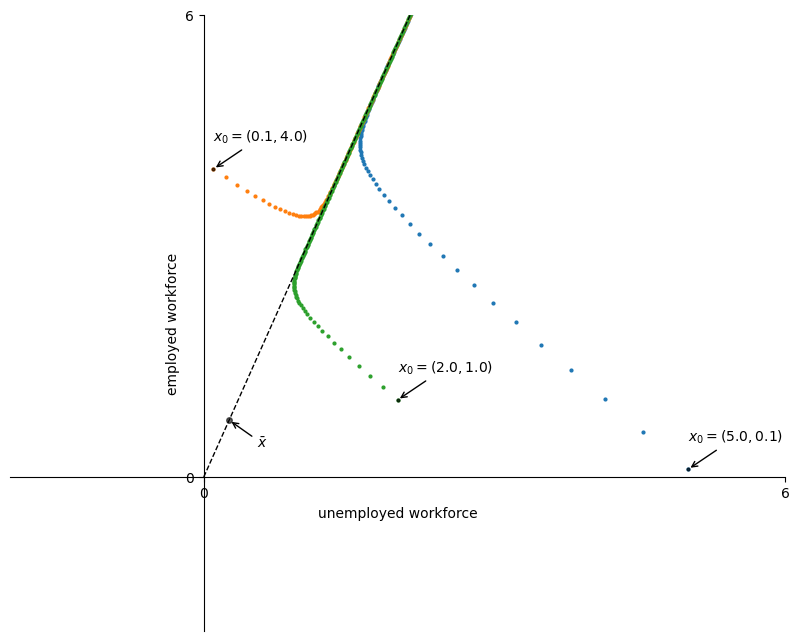

In [5]:
lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
x0 = ((5.0, 0.1), (0.1, 4.0), (2.0, 1.0))
plot_time_paths(lm, x0=x0)

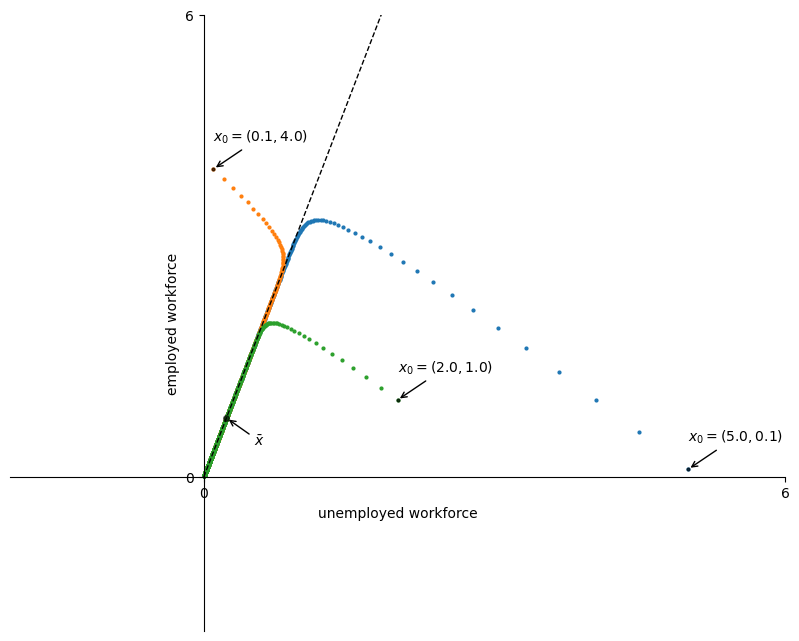

In [6]:
lm = LakeModel(α=0.01, λ=0.1, d=0.025, b=0.02)
plot_time_paths(lm, x0=x0)

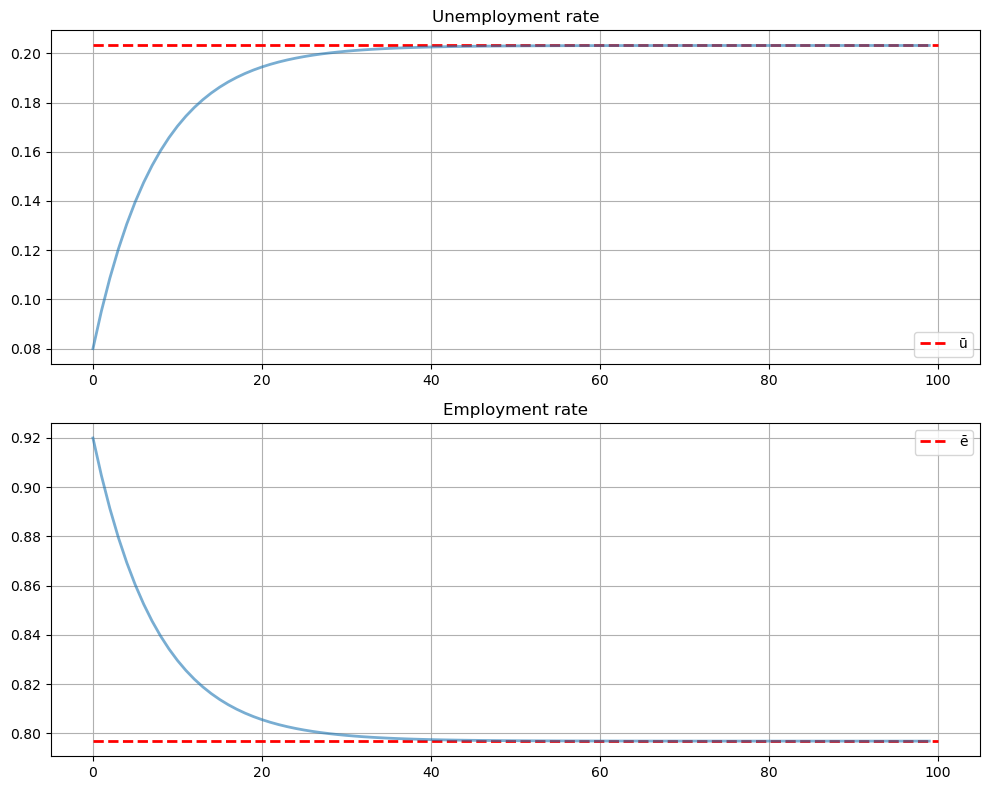

In [7]:
lm = LakeModel()
e_0 = 0.92          # Initial employment
u_0 = 1 - e_0       # Initial unemployment, given initial n_0 = 1

lm = LakeModel()
T = 100         # Simulation length

x_0 = (u_0, e_0)

x_path = lm.simulate_path(x_0, T)

rate_path = x_path / x_path.sum(0)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot steady ū and ē
axes[0].hlines(lm.ū, 0, T, 'r', '--', lw=2, label='ū')
axes[1].hlines(lm.ē, 0, T, 'r', '--', lw=2, label='ē')

titles = ['Unemployment rate', 'Employment rate']
locations = ['lower right', 'upper right']

# Plot unemployment rate and employment rate
for i, ax in enumerate(axes):
    ax.plot(rate_path[i, :], lw=2, alpha=0.6)
    ax.set_title(titles[i])
    ax.grid()
    ax.legend(loc=locations[i])


plt.tight_layout()
plt.show()

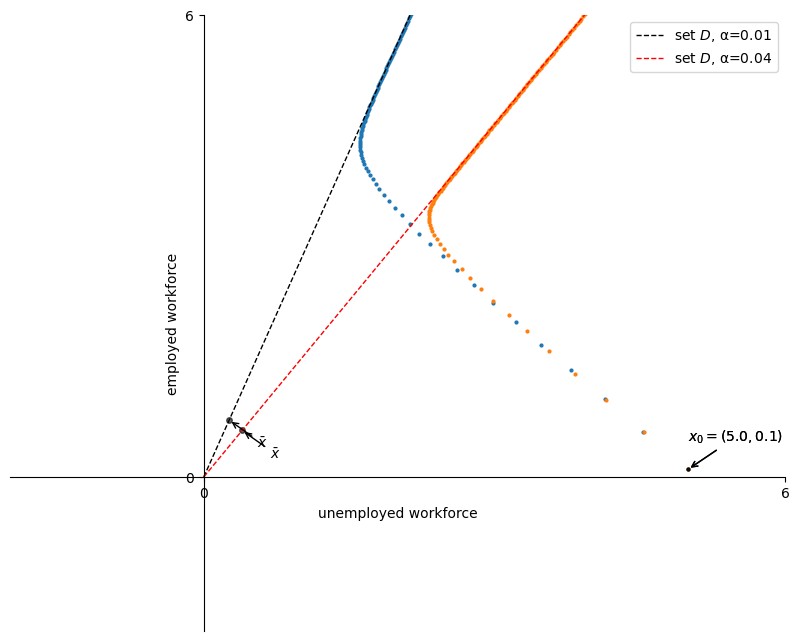

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
s=10
ax.plot([0, s * lm.ū], [0, s * lm.ē], "k--", lw=1, label='set $D$, α=0.01')

lm = LakeModel(α=0.04, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
ax.plot([0, s * lm.ū], [0, s * lm.ē], "r--", lw=1, label='set $D$, α=0.04')

ax.legend(loc='best')
plt.show()